# 数值归一化
因为较小的可能会被较大的数据所主导, 所以要将所有数据映射到同一尺度上

## 最值归一化 normalization
把所有数据映射到0~1之间    
$x_{scale} = \frac{x - x_{min}}{x_{max} - x_{max}}$    
适用于:
- 分布有明显边界的情况(如分数, 像素)
- 受outlier(异常点)影响较大(例如有一个特别大的, 那么其他小的都会集中在0左右)

In [167]:
import numpy as np
x = np.random.randint(0, 100, size=100)
print(x)

[ 3 31 46 12 72 35 33 92 81 37 14 78 16 46 65 59 29 79 28 63 80 76 72  9
 26 76 97 32 82 28 18 54 19 92  5  7 71 53 51 16 56 52 40 15 14 71 47 62
  0 13 27 10 96 96 94 69 68 63 72 37 60 74 40 29 76 56 82 58  6 39 73  6
 53 88 40 34 72 32 94 28 38 94 83 13 97 92 30 91 95 95 72 32 20 97 21 31
 24 58 88 15]


In [168]:
x_min = np.min(x)
x_max = np.max(x)
normal_x = np.array([(each-x_min)/(x_max - x_min) for each in x])

In [169]:
print(normal_x)

[0.03092784 0.31958763 0.4742268  0.12371134 0.74226804 0.36082474
 0.34020619 0.94845361 0.83505155 0.3814433  0.1443299  0.80412371
 0.16494845 0.4742268  0.67010309 0.60824742 0.29896907 0.81443299
 0.28865979 0.64948454 0.82474227 0.78350515 0.74226804 0.09278351
 0.26804124 0.78350515 1.         0.32989691 0.84536082 0.28865979
 0.18556701 0.55670103 0.19587629 0.94845361 0.05154639 0.07216495
 0.73195876 0.54639175 0.5257732  0.16494845 0.57731959 0.53608247
 0.41237113 0.15463918 0.1443299  0.73195876 0.48453608 0.63917526
 0.         0.13402062 0.27835052 0.10309278 0.98969072 0.98969072
 0.96907216 0.71134021 0.70103093 0.64948454 0.74226804 0.3814433
 0.6185567  0.7628866  0.41237113 0.29896907 0.78350515 0.57731959
 0.84536082 0.59793814 0.06185567 0.40206186 0.75257732 0.06185567
 0.54639175 0.90721649 0.41237113 0.35051546 0.74226804 0.32989691
 0.96907216 0.28865979 0.39175258 0.96907216 0.8556701  0.13402062
 1.         0.94845361 0.30927835 0.93814433 0.97938144 0.97938

## 均值方差归一化 standardization
把所有数据归一到均值为0方差为1的分布中    
$x_{scale} = \frac{x - x_{mean}}{S}$(标准正太化?)     
适用于:
- 数据没有明显边界
- 可能存在极端数据值

In [219]:
X = np.random.randint(0, 100, (50, 2))
X = np.array(X, dtype=float)
print(np.array([np.mean(X[:,i]) for i in range(X.shape[1])]))
print(np.mean(X, axis=0))

[45.02 45.4 ]
[45.02 45.4 ]


In [ ]:
X[:,0] = (X[:,0] - np.mean(X[:,0]))/np.std(X[:,0])
X[:,1] = (X[:,1] - np.mean(X[:,1]))/np.std(X[:,1])

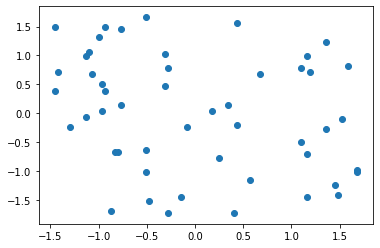

In [171]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.show()

In [172]:
np.mean(X[:,0]) # 均值约为0

-5.773159728050814e-17

In [173]:
np.std(X[:,0]) # 方差约为1

1.0

# scikit-learn中的数据归一化之Scaler

In [174]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

## StandardScaler

In [175]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X_train) # 先fit, 再transform

StandardScaler(copy=True, with_mean=True, with_std=True)

In [176]:
standardScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [177]:
standardScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [178]:
X_train_standard = standardScaler.transform(X_train)

In [179]:
X_test_standard = standardScaler.transform(X_test) # 测试数据集的mean, std得用训练数据的mean, std, 因为再现实情况中, mean, std不好求, 有时候一次来一个样本, 计算不了mean, std

In [180]:
# 对归一化后的测试数据集进行精度测试
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_standard, y_train)
knn_clf.score(X_test_standard, y_test)

1.0

### 测试自己写的StandardScaler

In [229]:
from preprocessing import StandardScaler

In [237]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

In [240]:
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_standard, y_train)
knn_clf.score(X_test_standard, y_test)

1.0

## MaxMinScaler

In [242]:
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()

In [243]:
maxAbsScaler.fit(X_train)

MaxAbsScaler(copy=True)

In [245]:
X_train_m = maxAbsScaler.transform(X_train)
X_test_m = maxAbsScaler.transform(X_test)
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_m, y_train)
knn_clf.score(X_test_m, y_test)

1.0